In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re,glob,os

#%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

load data

In [2]:
GMKG = np.loadtxt('../data/band_structure.txt', delimiter = ',')

GMKG_Length = GMKG[:, 0]
GMKG_Bands = GMKG[:, 1:]
First_band_max = np.ones(len(GMKG_Length))*np.max(GMKG[:, 1])
First_band_min = np.ones(len(GMKG_Length))*np.min(GMKG[:, 1])

In [3]:
GMKG_Length_stretched = 0*GMKG_Length

M_length = GMKG_Length[24]
K_length = GMKG_Length[32]
G_length = GMKG_Length[40]
band_M = GMKG_Bands[24]
band_K = GMKG_Bands[32]
band_G = GMKG_Bands[0]

GMKG_Length_stretched[0:25] = GMKG_Length[0:25]
GMKG_Length_stretched[25:33] = (GMKG_Length[25:33] - M_length)/(K_length-M_length)*M_length/np.sqrt(3) + M_length
GMKG_Length_stretched[33:41] = ((GMKG_Length[33:41] - K_length)/(G_length-K_length)*M_length/np.sqrt(3)*2 
                                 + GMKG_Length_stretched[32])

In [4]:
g1 = [2*np.pi, 0]
g2 = [1*np.pi, np.sqrt(3)*np.pi]
g3 = [-1*np.pi, np.sqrt(3)*np.pi]
g4 = [3*np.pi, np.sqrt(3)*np.pi]
g5 = [0*np.pi, 2*np.sqrt(3)*np.pi]
g6 = [-3*np.pi, np.sqrt(3)*np.pi]

def bs_cosines(x, y, a, b):
    why = 4/(2*np.sqrt(3))
    r = [x*why, y*why]
    first_set = a*(np.cos(np.dot(r, g1)/2)+np.cos(np.dot(r, g2)/2)+np.cos(np.dot(r, g3)/2))
    second_set = b*(np.cos(np.dot(r, g4)/2)+np.cos(np.dot(r, g5)/2)+np.cos(np.dot(r, g6)/2))
    combined = first_set + second_set
    return  combined

def bs_mesh(X, Y, a, b):
    band_structure = np.zeros((len(X), len(Y)))
    for ix in range(len(X)): 
        for iy in range(len(Y)):
            band_structure[ix, iy] = bs_cosines(X[ix], Y[iy], a, b)
            
    return band_structure

In [5]:
print(band_M[0]-band_G[0])
print(band_K[0]-band_G[0])

10.565054096756
13.11216067766199


In [6]:
X = np.linspace(-2,2,100)
Y = np.linspace(-2,2,100)
a = -2.91381348
b = 0.27255

fit_0 = bs_cosines(0, 0, a, b)
fit_s = bs_cosines(0, 1, a, b)
fit_m = bs_cosines(1/np.sqrt(3), 1, a, b)
print(fit_s-fit_0)
print(fit_m-fit_0)

10.56505392
13.11216066


In [7]:
GMKG_cosines = 0*GMKG_Length

for i in range(25):
    GMKG_cosines[i] = bs_cosines(0, i/25, a, b)
    
for i in range(25, 33):
    GMKG_cosines[i] = bs_cosines((i-24)/np.sqrt(3)/(33-25), 1, a, b)
    
for i in range(33, 41):
    GMKG_cosines[i] = bs_cosines(1/np.sqrt(3) - (i-32)/np.sqrt(3)/(41-33), 1 - (i-32)/(41-33), a, b)
    
GMKG_cosines = GMKG_cosines - np.min(GMKG_cosines) + np.min(GMKG_Bands)

Plotting

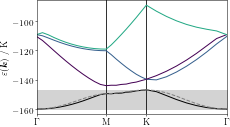

In [8]:
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(3)]

plt.axvline(GMKG_Length_stretched[24], color = 'black', linewidth = 0.8)
plt.axvline(GMKG_Length_stretched[32], color = 'black', linewidth = 0.8)

#plt.plot(GMKG_Length_stretched, First_band_max, c = 'lightgrey', lw = 0.8)
#plt.plot(GMKG_Length_stretched, First_band_min, c = 'lightgrey', lw = 0.8)
plt.fill_between(GMKG_Length_stretched, First_band_min, First_band_max, color = 'lightgrey')

plt.plot(GMKG_Length_stretched, GMKG_Bands[:, 0], c = 'black', lw = 1)
plt.plot(GMKG_Length_stretched[0:33], GMKG_Bands[0:33, 1], c = colors[0], lw = 1)
plt.plot(GMKG_Length_stretched[0:33], GMKG_Bands[0:33, 2], c = colors[1], lw = 1)
plt.plot(GMKG_Length_stretched[32:], GMKG_Bands[32:, 1], c = colors[1], lw = 1)
plt.plot(GMKG_Length_stretched[32:], GMKG_Bands[32:, 2], c = colors[0], lw = 1)
plt.plot(GMKG_Length_stretched, GMKG_Bands[:, 3], c = colors[2], lw = 1)

plt.plot(GMKG_Length_stretched, GMKG_cosines, c = 'grey', lw = 1, linestyle = "--")

plt.xlim(GMKG_Length_stretched[0], GMKG_Length_stretched[-1])

plt.xticks([GMKG_Length_stretched[0], GMKG_Length_stretched[24], GMKG_Length_stretched[32], 
            GMKG_Length_stretched[40]], [r'$\Gamma$', r'M', r'K' , r'$\Gamma$'])
plt.tick_params(top=False)

plt.ylabel(r"$\varepsilon (\boldsymbol{k})$ / K")

plt.savefig('../plots/band_structure.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
#plt.savefig('BandStructure.svg', transparent=False) 

plt.show()